# PCA Analysis

### Import Libraries for PCA

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

### Import Cleaned Dataset

In [2]:
df = pd.read_csv('/Users/Richard/OneDrive - Western Governors University/MSDA/D206/churn_clean.csv')

### Slice and retain the relevant eleven PCA related variables

In [3]:
data = df.loc[:, 'Tenure':'item8']
data.head()

,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


### Normalize the data

In [4]:
churn_normalized = (data - data.mean()) / data.std()

### Select components for extraction

In [5]:
pca = PCA(n_components = data.shape[1])

### Create PCA list names

In [6]:
churn_numeric = data[['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
'item1', 'item2', 'item3', 'item4', 'item5',
'item6', 'item7', 'item8']]
pcs_names = []
for i, col in enumerate(churn_numeric.columns):
    pcs_names.append('PC' + str(i + 1))
print(pcs_names)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']


### Call to PCA and convert variables into components

In [7]:
pca.fit(churn_normalized)
churn_pca = pd.DataFrame(pca.transform(churn_normalized),
columns = pcs_names)

### Create Scree Plot

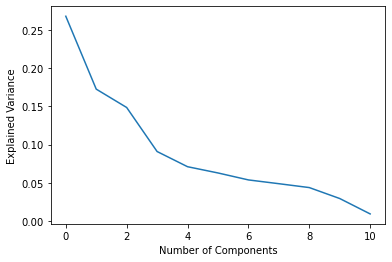

In [8]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show();

### Extract Eigenvalues

In [9]:
cov_matrix = np.dot(churn_normalized.T, churn_normalized) / data.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for
eigenvector in pca.components_]

### Plot Eigenvalues

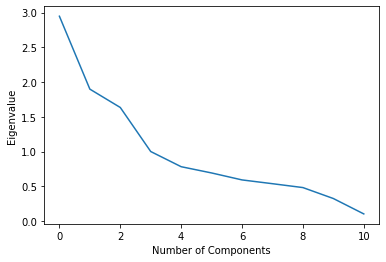

In [10]:
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.show();

### Select fewest components

In [11]:
for pc, var in zip(pcs_names, np.cumsum(pca.explained_variance_ratio_)):
    print(pc, var)

PC1 0.2679266062396306
PC2 0.44053732880229357
PC3 0.5891444522248597
PC4 0.6801579842425086
PC5 0.7513217054372501
PC6 0.814311709410132
PC7 0.8681970531672318
PC8 0.917138736258883
PC9 0.9610122820002187
PC10 0.9905736363144831
PC11 1.0


### Create a rotation to explain variance in components

In [12]:
rotation = pd.DataFrame(pca.components_.T, columns = pcs_names, index =
churn_numeric.columns)
print(rotation)

                        PC1       PC2       PC3       PC4       PC5       PC6  \
Tenure            -0.010403  0.701838 -0.072209 -0.063594  0.005683 -0.011155   
MonthlyCharge      0.000317  0.041147 -0.014151  0.996995 -0.022136  0.015231   
Bandwidth_GB_Year -0.012166  0.703079 -0.074222  0.004399  0.009590  0.003466   
item1              0.458932  0.031325  0.281154  0.018568 -0.070233 -0.119149   
item2              0.434134  0.042559  0.282404  0.007508 -0.106632 -0.169752   
item3              0.400639  0.034665  0.281118 -0.019631 -0.173742 -0.255336   
item4              0.145799 -0.050367 -0.567815 -0.010310 -0.171334 -0.483328   
item5             -0.175633  0.066334  0.587335 -0.000047  0.135949  0.060124   
item6              0.405207 -0.012680 -0.183447  0.004596 -0.062342  0.064609   
item7              0.358342 -0.003886 -0.181697 -0.027959 -0.182406  0.806166   
item8              0.308925 -0.017396 -0.131173  0.015574  0.931612 -0.011133   

                        PC7

### Output component loadings

In [13]:
loadings = pd.DataFrame(pca.components_.T,
columns = pcs_names,
index = data.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Tenure,-0.010403,0.701838,-0.072209,-0.063594,0.005683,-0.011155,0.007419,-0.011527,0.006935,0.003286,-0.705445
MonthlyCharge,0.000317,0.041147,-0.014151,0.996995,-0.022136,0.015231,-0.018038,-0.004316,0.023690,-0.013785,-0.047865
Bandwidth_GB_Year,-0.012166,0.703079,-0.074222,0.004399,0.009590,0.003466,0.003701,-0.002364,-0.008068,0.008529,0.706925
item1,0.458932,0.031325,0.281154,0.018568,-0.070233,-0.119149,-0.045963,0.025431,-0.240574,0.793237,-0.004306
item2,0.434134,0.042559,0.282404,0.007508,-0.106632,-0.169752,-0.065414,0.074400,-0.592131,-0.573832,-0.002217
item3,0.400639,0.034665,0.281118,-0.019631,-0.173742,-0.255336,-0.146887,-0.396333,0.673088,-0.177665,0.014933
item4,0.145799,-0.050367,-0.567815,-0.010310,-0.171334,-0.483328,-0.443353,0.431528,0.087207,0.018301,0.002283
item5,-0.175633,0.066334,0.587335,-0.000047,0.135949,0.060124,-0.209767,0.693861,0.265474,-0.042012,-0.002514
item6,0.405207,-0.012680,-0.183447,0.004596,-0.062342,0.064609,0.757954,0.402835,0.230319,-0.063972,0.001604
item7,0.358342,-0.003886,-0.181697,-0.027959,-0.182406,0.806166,-0.379136,0.067889,0.067293,-0.040946,-0.006875


### Extract reduced dataset and list final 3 components

In [14]:
churn_reduced = churn_pca.iloc[ : , 0:3]
print(churn_reduced)

           PC1       PC2       PC3
0     1.923875 -1.421955  1.903125
1    -0.199798 -1.706801  0.538766
2    -0.667923 -0.985940  0.227390
3     0.046465 -0.730628  2.282040
4     1.326741 -1.924880  0.825729
...        ...       ...       ...
9995 -2.097964  1.961837  0.104147
9996  1.917485  1.645946  0.611009
9997  1.431918  0.323573  0.028288
9998  2.011460  2.187756 -0.079864
9999 -2.266364  1.591986 -0.819973

[10000 rows x 3 columns]
